In [23]:

import matplotlib.pyplot as plt
import numpy as np
from casadi import *

import importlib
import solvers_and_functions_package.Multi_wind as model
importlib.reload(model)



<module 'solvers_and_functions_package.Multi_wind' from 'C:\\Users\\irmas\\Documents\\TUM\\CaseCourse\\CasADi\\Main\\New_2D_model\\solvers_and_functions_package\\Multi_wind.py'>

Total number of variables............................:     2561
                     variables with only lower bounds:      481
                variables with lower and upper bounds:      640
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2400
Total number of inequality constraints...............:      963
        inequality constraints with only lower bounds:      483
   inequality constraints with lower and upper bounds:      480
        inequality constraints with only upper bounds:        0


Number of Iterations....: 53

                                   (scaled)                 (unscaled)
Objective...............:  -1.4489084199988417e-01   -1.4489084199988417e-01
Dual infeasibility......:   1.0495503664071480e-13    1.0495503664071480e-13
Constraint violation....:   2.7422508708241367e-12    2.7422508708241367e-12
Variable bound violation:   1.8910282673090251e-08    1.8910282673090251e-08
Complementari

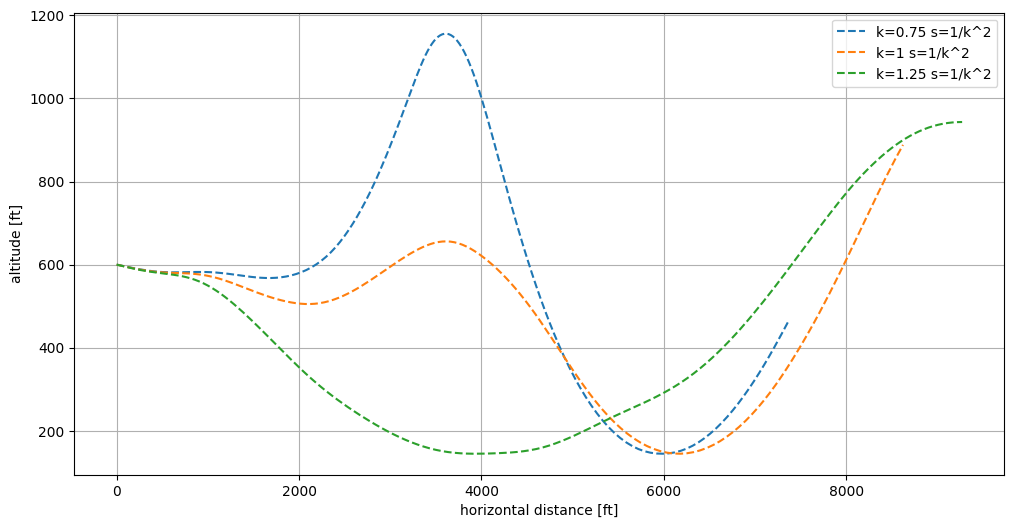

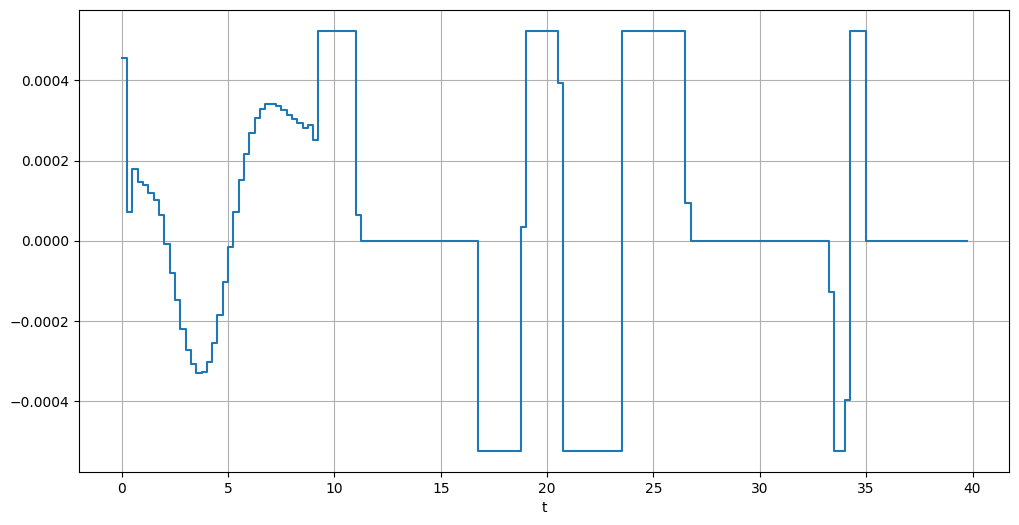

In [16]:
A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
pec = False
N = 160

sols = []
#k_list = [0.75, 1, 1.25]
#s_list = [1,1,1]

k_list = [0.75, 1, 1.25]
s_list = [1/0.75**2,1,1/1.25**2]

#k_list = [1,1,1]
#s_list = [0.75, 1, 1.25]
M = len(k_list)

w, J = model.solver_min_h_scaled(k_values=k_list,s_values=s_list,A_w=A_w,B_w=B_w,N=N,integrator=integrator)
model.ploter(w,k_list,s_list,N=N,is_scaled=True,is_bolza=False)


In [ ]:
# Sensitivity

A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
integrator_comp = model.rk4_step_bolza
pec = False
N = 160


k_list = [1,1.25,0.75,1,1,0.75,1.25]
s_list = [1,1,1,1.25,0.75,1/0.75**2,1/1.25**2]

M = len(k_list)

w, J = model.solver_min_h_scaled(k_values=k_list,s_values=s_list,A_w=A_w,B_w=B_w,N=N,integrator=integrator)
model.ploter(w,k_list,s_list,N=N,is_scaled=True,is_bolza=False)

u=model.u_opt_return(w,N,True)

k=1, s=1, min h = 320.39200976466003
k=0.9, s=1, min h = 360.6332762828291
k=0.95, s=1, min h = 355.02564740679276
k=1.05, s=1, min h = 269.5607803622181
k=1.1, s=1, min h = 219.171966801005


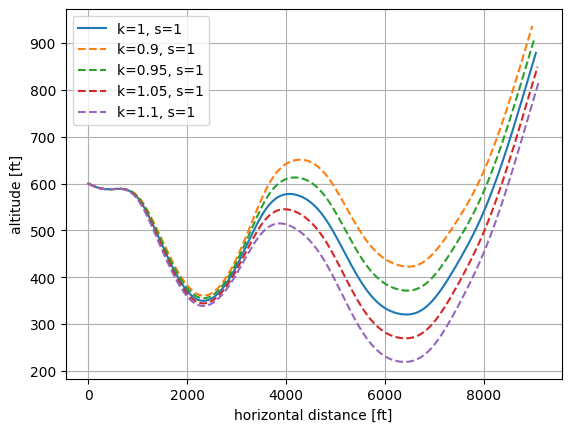

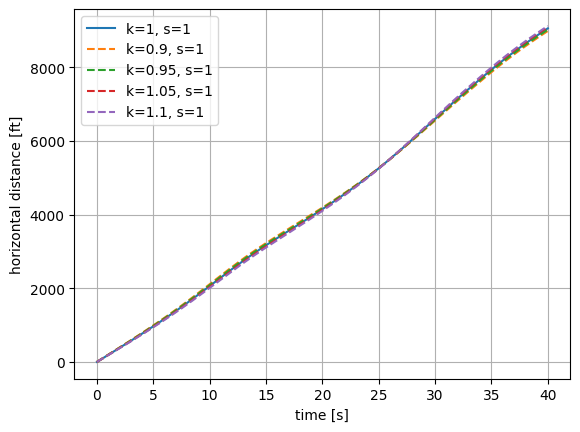

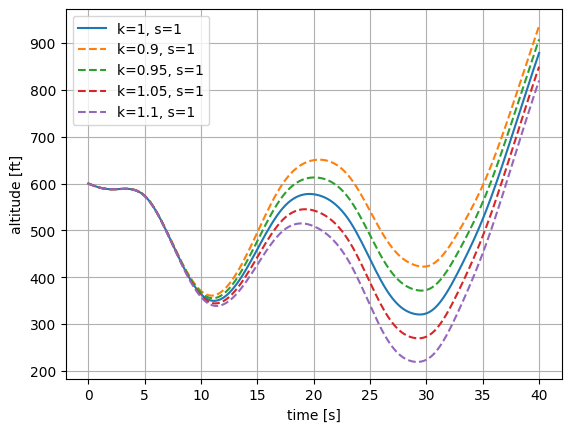

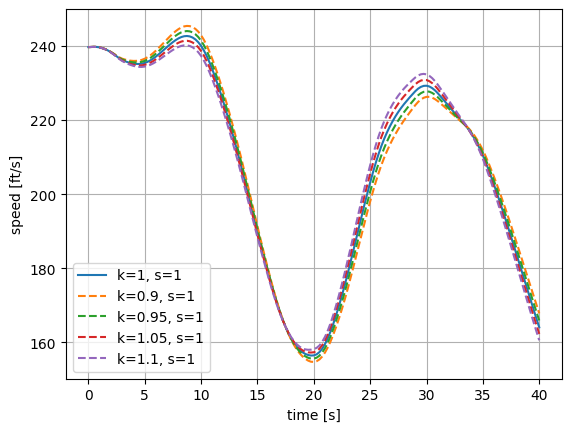

In [27]:

k_values = [1, 0.9, 0.95, 1.05, 1.1]
s_values = [1, 1, 1, 1, 1]
nk = len(k_values)
sols = []

for i in range(nk):
    # {'x': X[0::5],'h': X[1::5],'v': X[2::5],'gamma': X[3::5],'alpha': X[4::5],'u':U,'t_grid':T, 'hdotdot': H_dotdot, 'J': J}
    k = k_values[i]
    s= s_values[i]
    sol = model.trajectory_computation_dictonary(u,k,s,A_w,B_w,N_org=N,integrator=integrator_comp)
    sols.append(sol)
    print(fr"k={k}, s={s}, min h = {float(min(sol['h']))}")


plt.figure()
plt.plot(sols[0]['x'], sols[0]['h'], label=rf"k={k_values[0]}, s={s_values[0]}")
for i in range(1,nk):
    plt.plot(sols[i]['x'], sols[i]['h'], '--', label=rf"k={k_values[i]}, s={s_values[i]}")
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.legend()
plt.grid()
plt.show()

plt.plot(sols[0]['t_grid'], sols[0]['x'], label=rf"k={k_values[0]}, s={s_values[0]}")
for i in range(1,nk):
    plt.plot(sols[i]['t_grid'], sols[i]['x'], '--', label=rf"k={k_values[i]}, s={s_values[i]}")
plt.xlabel('time [s]')
plt.ylabel('horizontal distance [ft]')
plt.legend()
plt.grid()
plt.show()

plt.plot(sols[0]['t_grid'], sols[0]['h'], label=rf"k={k_values[0]}, s={s_values[0]}")
for i in range(1,nk):
    plt.plot(sols[i]['t_grid'], sols[i]['h'], '--', label=rf"k={k_values[i]}, s={s_values[i]}")
plt.xlabel('time [s]')
plt.ylabel('altitude [ft]')
plt.legend()
plt.grid()
plt.show()

plt.plot(sols[0]['t_grid'], sols[0]['v'], label=rf"k={k_values[0]}, s={s_values[0]}")
for i in range(1,nk):
    plt.plot(sols[i]['t_grid'], sols[i]['v'], '--', label=rf"k={k_values[i]}, s={s_values[i]}")
plt.xlabel('time [s]')
plt.ylabel('speed [ft/s]')
plt.legend()
plt.grid()
plt.show()


Total number of variables............................:     2561
                     variables with only lower bounds:      481
                variables with lower and upper bounds:      640
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2400
Total number of inequality constraints...............:      963
        inequality constraints with only lower bounds:      483
   inequality constraints with lower and upper bounds:      480
        inequality constraints with only upper bounds:        0


Number of Iterations....: 53

                                   (scaled)                 (unscaled)
Objective...............:  -1.4489084199988417e-01   -1.4489084199988417e-01
Dual infeasibility......:   1.0495503664071480e-13    1.0495503664071480e-13
Constraint violation....:   2.7422508708241367e-12    2.7422508708241367e-12
Variable bound violation:   1.8910282673090251e-08    1.8910282673090251e-08
Complementari

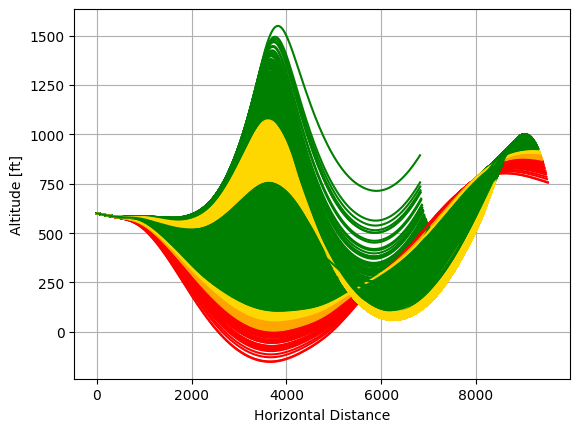

min k from sample: 0.511
max k from sample: 1.442
min s from sample: 0.481
max s from sample: 3.830
Minimum altitude over all runs: -152.351
Crash rate: 0.38%
Fail 50 feet rate: 0.7000000000000001%
Fail 100 rate: 31.230000000000004%
{'x2dotdot_low': [], 'x2dotdot_high': []}


In [5]:
# enegry
A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
N = 160
k = [0.75,1,1.25]
s = [1/0.75**2,1,1/1.25**2]
w, J = model.solver_min_h_scaled(k_values=k,s_values=s,A_w=A_w,B_w=B_w,N=N,integrator=integrator)
u = model.u_opt_return(w,N,True)

violating_ks = model.MC_simulations(u,10000,A_w,B_w,2,1,1,0.25/2, integrator=model.MC_rk4_step)
print(violating_ks)

Total number of variables............................:     2561
                     variables with only lower bounds:      481
                variables with lower and upper bounds:      640
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2400
Total number of inequality constraints...............:      963
        inequality constraints with only lower bounds:      483
   inequality constraints with lower and upper bounds:      480
        inequality constraints with only upper bounds:        0


Number of Iterations....: 53

                                   (scaled)                 (unscaled)
Objective...............:  -1.4489084199988417e-01   -1.4489084199988417e-01
Dual infeasibility......:   1.0495503664071480e-13    1.0495503664071480e-13
Constraint violation....:   2.7422508708241367e-12    2.7422508708241367e-12
Variable bound violation:   1.8910282673090251e-08    1.8910282673090251e-08
Complementari

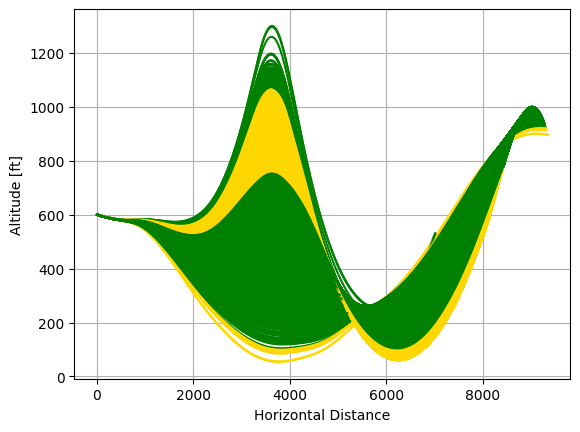

min k from sample: 0.672
max k from sample: 1.305
min s from sample: 0.587
max s from sample: 2.217
Minimum altitude over all runs: 53.842
Crash rate: 0.0%
Fail 50 feet rate: 0.0%
Fail 100 rate: 27.839999999999996%
{'x2dotdot_low': [], 'x2dotdot_high': []}


In [6]:
# enegry
A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
N = 160
k = [0.75,1,1.25]
s = [1/0.75**2,1,1/1.25**2]
w, J = model.solver_min_h_scaled(k_values=k,s_values=s,A_w=A_w,B_w=B_w,N=N,integrator=integrator)
u = model.u_opt_return(w,N,True)

violating_ks = model.MC_simulations(u,10000,A_w,B_w,2,1,1,0.25/3, integrator=model.MC_rk4_step)
print(violating_ks)

Total number of variables............................:     5761
                     variables with only lower bounds:     1121
                variables with lower and upper bounds:     1280
                     variables with only upper bounds:        0
Total number of equality constraints.................:     5600
Total number of inequality constraints...............:     2247
        inequality constraints with only lower bounds:     1127
   inequality constraints with lower and upper bounds:     1120
        inequality constraints with only upper bounds:        0


Number of Iterations....: 55

                                   (scaled)                 (unscaled)
Objective...............:  -7.0600525531376288e-02   -7.0600525531376288e-02
Dual infeasibility......:   1.2973119861083310e-12    1.2973119861083310e-12
Constraint violation....:   1.5573764500231846e-11    1.5573764500231846e-11
Variable bound violation:   9.7898875672797203e-09    9.7898875672797203e-09
Complementari

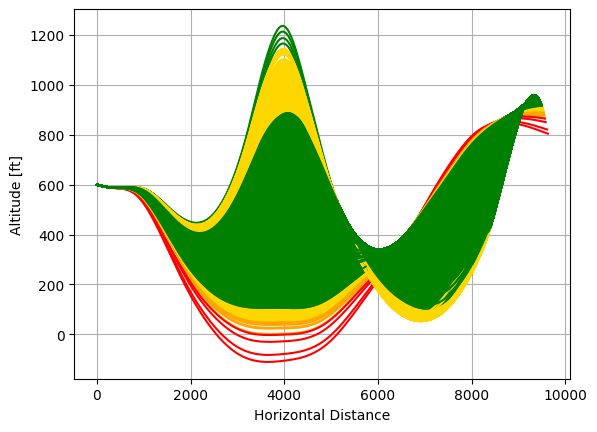

min k from sample: 0.682
max k from sample: 1.365
min s from sample: 0.537
max s from sample: 2.150
Minimum altitude over all runs: -110.621
Crash rate: 0.04%
Fail 50 feet rate: 0.12%
Fail 100 rate: 4.84%
{'x2dotdot_low': [], 'x2dotdot_high': []}


In [28]:

# enegry
A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
N = 160
k = [1,1.25,0.75,1,1,0.75,1.25]
s = [1,1,1,1.25,0.75,1/0.75**2,1/1.25**2]
w, J = model.solver_min_h_scaled(k_values=k,s_values=s,A_w=A_w,B_w=B_w,N=N,integrator=integrator)
u = model.u_opt_return(w,N,True)

violating_ks = model.MC_simulations(u,10000,A_w,B_w,2,1,1,0.25/3, integrator=model.MC_rk4_step)
print(violating_ks)